In [14]:
%pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for pretty plots
sns.set(style="whitegrid")

In [16]:
df = pd.read_csv("Dataset/MBA.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [17]:
print("Shape:", df.shape)
df.info()
print("Statistical summary")
df.describe()  # Statistical summary

Shape: (6194, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
Statistical summary


,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


<Axes: >

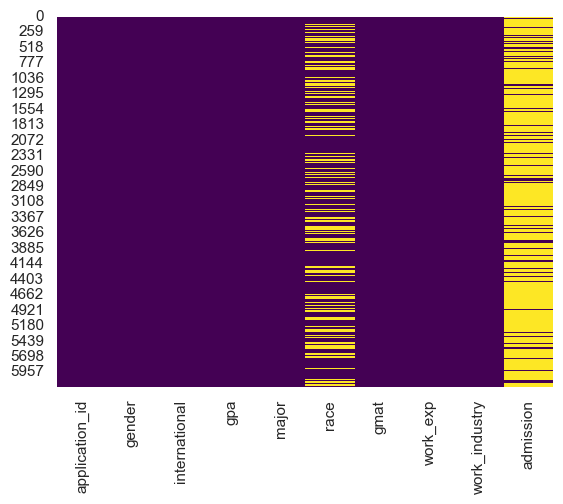

In [18]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

Yellow represents null values

purple represents actual values

From the above diagram we can see the admission attribute has a lot of missing data whilst the race column has some missing data. In the description of the dataset from kaggle it was stated that in the admission column null represents Deny or Rejected and in the race colum null represents an international student


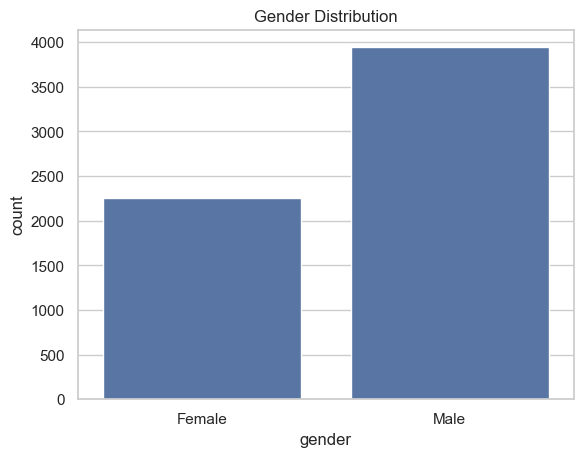

In [19]:
# Example for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

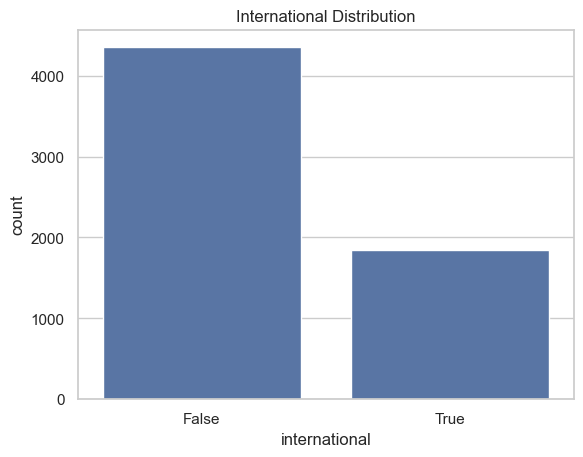

In [20]:
sns.countplot(x='international', data=df)
plt.title('International Distribution')
plt.show()

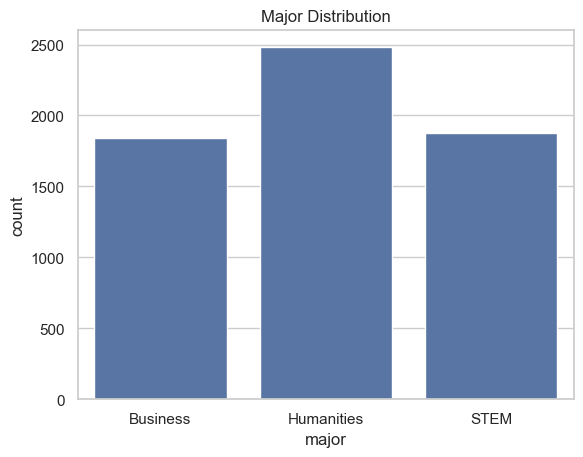

In [21]:
sns.countplot(x='major', data=df)
plt.title('Major Distribution')
plt.show()

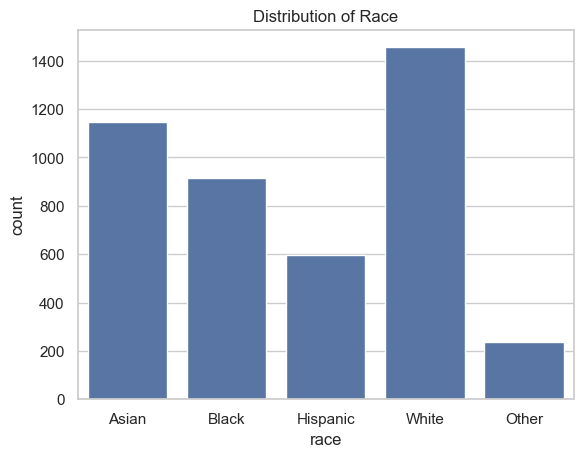

In [22]:
sns.countplot(x='race', data=df)
plt.title('Distribution of Race')
plt.show()

In [23]:
df['admission'] = df['admission'].fillna('Rejected')

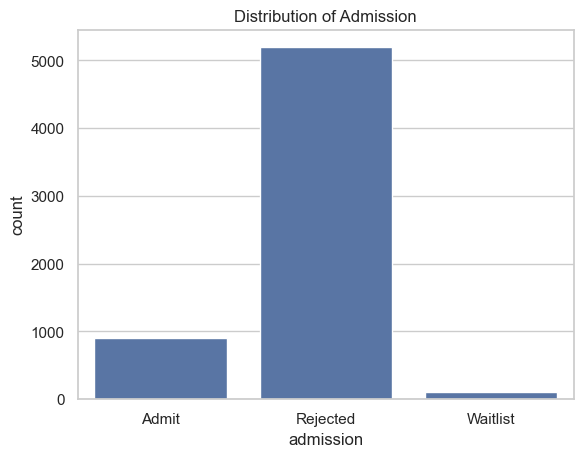

In [24]:
sns.countplot(x='admission', data=df)
plt.title('Distribution of Admission')
plt.show()

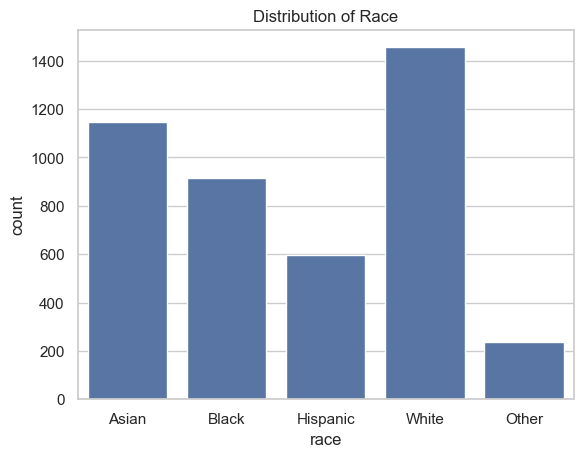

In [25]:
sns.countplot(x='race', data=df)
plt.title('Distribution of Race')
plt.show()

In [26]:

df['race'] = df['race'].fillna('International')

df['race'] = df['race'].replace('Other', 'International')


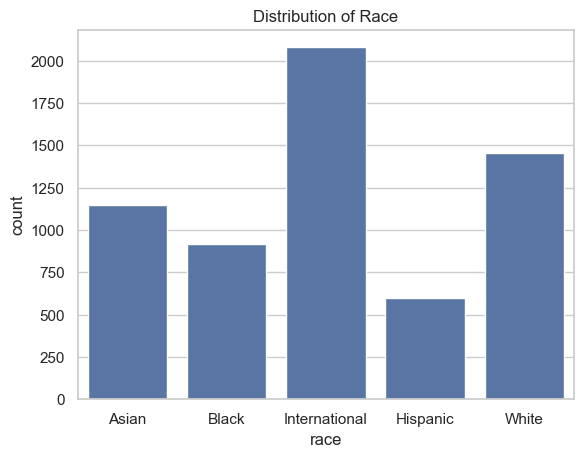

In [27]:
sns.countplot(x='race', data=df)
plt.title('Distribution of Race')
plt.show()


In [30]:
# Step 1: Get value counts
industry_counts = df['work_industry'].value_counts()

# Step 2: Identify industries with less than 200 entries
to_combine = industry_counts[industry_counts < 200].index

# Step 3: Replace them with 'Other'
df['work_industry'] = df['work_industry'].replace(to_combine, 'Other')


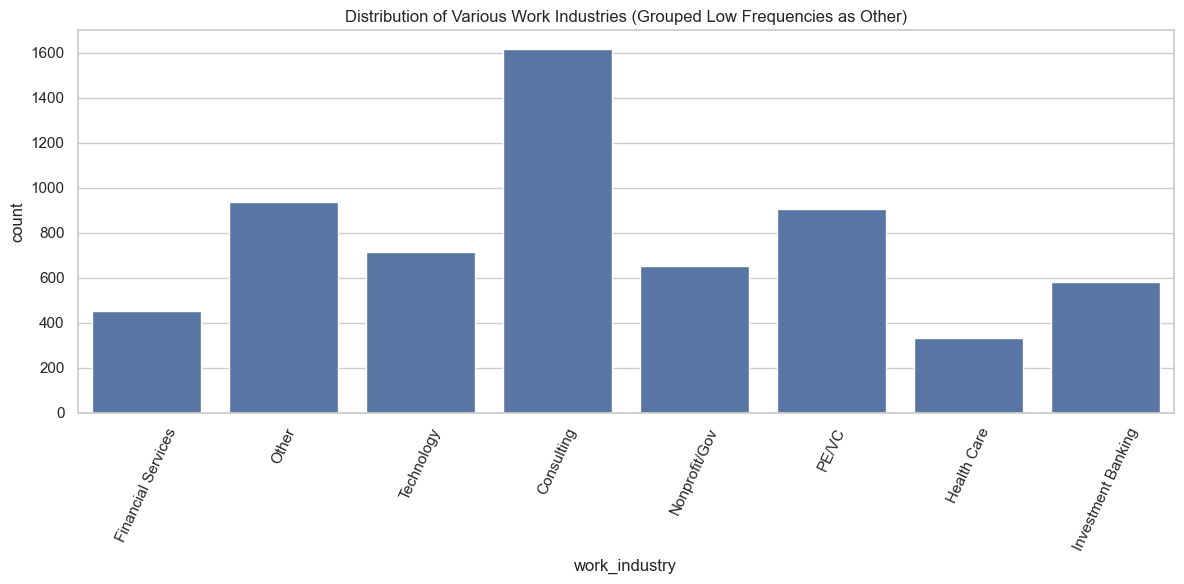

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='work_industry', data=df)
plt.title('Distribution of Various Work Industries (Grouped Low Frequencies as Other)')

plt.xticks(rotation=65)
plt.tight_layout()
plt.show()


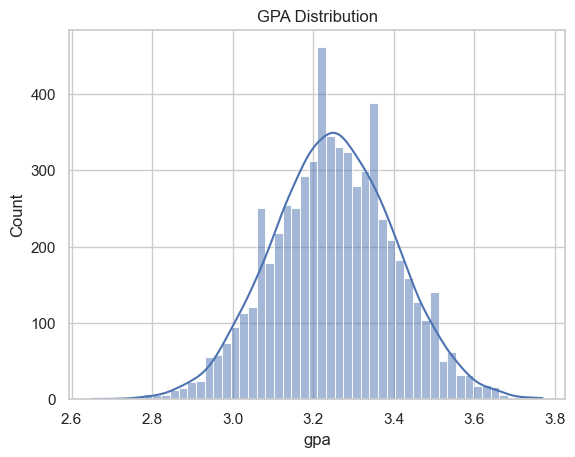

In [37]:
# GPA Histogram
sns.histplot(df['gpa'], kde=True)
plt.title('GPA Distribution')
plt.show()

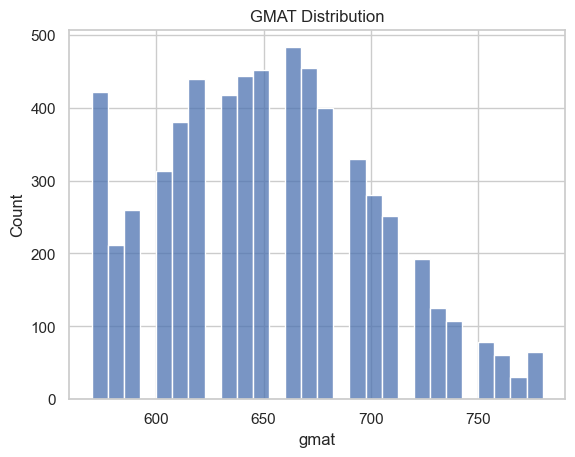

In [41]:
# GPA Histogram
sns.histplot(df['gmat'])
plt.title('GMAT Distribution')
plt.show()

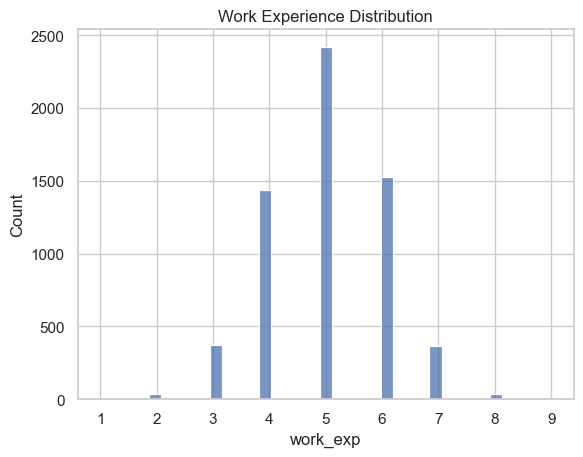

In [40]:
# GPA Histogram
sns.histplot(df['work_exp'])
plt.title('Work Experience Distribution')
plt.show()

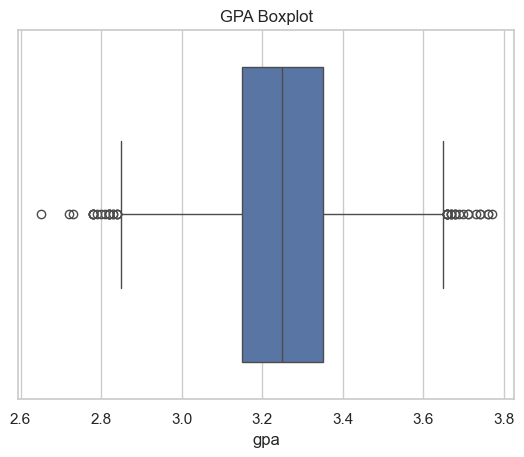

In [45]:
sns.boxplot(x=df['gpa'])
plt.title('GPA Boxplot')
plt.show()

In [48]:

admitted_df = df[df['admission'].isin(['Admit', 'Waitlist'])]

admitted_df = admitted_df.reset_index(drop=True)


In [49]:
# Save the filtered dataset to a CSV file
admitted_df.to_csv('admitted_or_waitlist.csv', index=False)
